# KAN Symbolic Regression Example

This notebook demonstrates the use of KAN (Kolmogorov-Arnold Networks) for symbolic regression using the `kan_sr` module.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from openai import OpenAI
import os
import sys
import sympy
from sympy import symbols

# Add the parent directory to the path to import LLMSR
sys.path.append('..')
from LLMSR import kan_sr
from kan import KAN
import LLMSR.llm

## Set up OpenAI client

You need to have an OpenAI API key for this example to work.

In [2]:
client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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", 
)
LLMSR.llm.check_key_limit(client)


# Custom system prompt for the LLM
system_prompt_for_second_simplification = None # if we set it to None or 'default', the default one in the kan_sr.py will be used

2025-03-11 19:28:35,900 - LLMSR.llm - INFO - API key check successful. Remaining limit: None


## Example 1: Simple Polynomial Function

We'll start with a simple example to demonstrate the basic workflow.

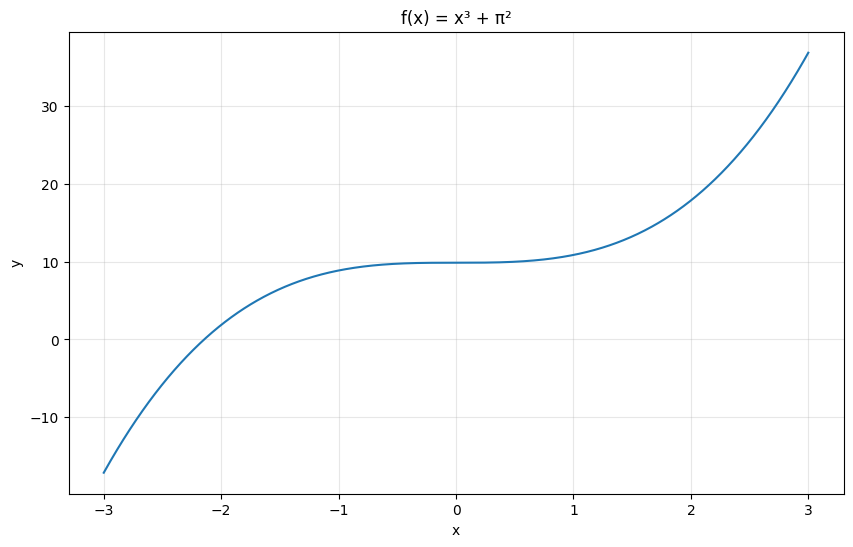

In [3]:
# Define a target function: f(x) = x³ + π²
def target_function(x):
    return (x**3 + np.pi**2)

# Define the function as a PyTorch function
def f(x):
    return (x**3 + torch.pi**2)

# Plot the function
x_range = (-3, 3)
x = np.linspace(x_range[0], x_range[1], 1000)
y = target_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = x³ + π²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

## Train a KAN model and convert it to symbolic expressions

Now we'll use our `kan_sr` module to train a KAN model and extract symbolic expressions.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Set up KAN model parameters
width = [1, 2, 1]  # Network architecture
grid = 7           # Grid size
k = 3              # Number of basis functions
train_steps = 500  # Number of training steps
seed = 17


# Create a KAN model
model =  model = KAN(width=width, grid=grid, k=k, seed=seed, device=  device , symbolic_enabled=False)

# Create a dataset
dataset = kan_sr.create_dataset(f, n_var=1, ranges=x_range, train_num=10000, test_num=1000, device="cpu")
res = model.fit(dataset, opt='LBFGS', steps=train_steps)
pruned_model = model.prune(node_th=0.2, edge_th=0.2)
train_loss = res['train_loss']
model.plot()
pruned_model.plot()

2025-03-11 13:28:44,156 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-11 13:28:44,157 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


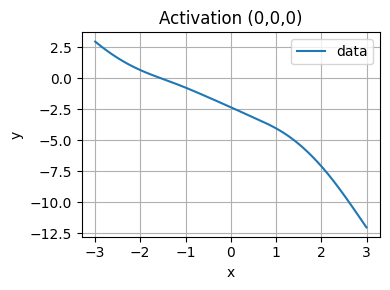

2025-03-11 13:28:44,265 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-11 13:28:44,266 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 1.6706292567635572, for constant: [-2.90777751]
2025-03-11 13:28:44,266 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 13:28:47,633 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 13:28:47,634 - LLMSR.llmSR - INFO - Initial population best: score=-0.23027351829127354, params=[-0.09833611 -1.56334145 -3.01669488], ansatz: params[0] * np.power(x, 3) + params[1] * x + params[2]...
2025-03-11 13:28:47,635 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 13:28:54,193 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.23027351829127354, params=[-0.09833611 -1.56334145 -3.01669488], ansatz: params[0] * np.power(x, 3) + params[1] * x + params[2]...
2025-03-11 13:28:54,194 - LLMSR.llmSR - INFO -


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 1
  Success rate: 99.01%

Breakdown by processing stage:
  Api Call: 101 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 1 failed (99.01% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 1
Approximation for (0,0,0): params[0] * np.power(x, 3) + params[1] * x + params[2], with parameters [-0.098 -1.563 -3.017]


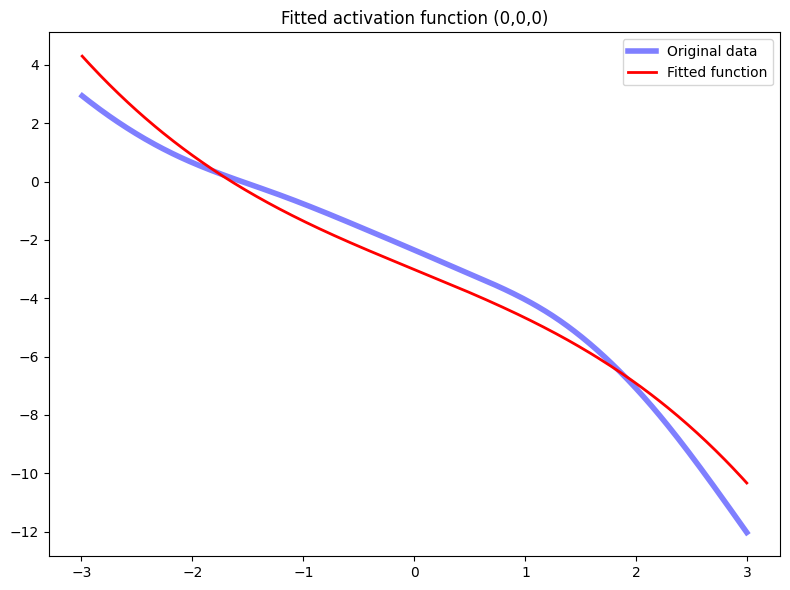

2025-03-11 13:29:18,466 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


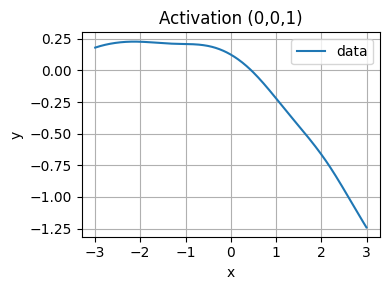

2025-03-11 13:29:18,553 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-11 13:29:18,554 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 11.975085288623209, for constant: [-0.12663393]
2025-03-11 13:29:18,554 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 13:29:21,623 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 13:29:21,624 - LLMSR.llmSR - INFO - Initial population best: score=-22.728004769614355, params=[-0.8425847   0.14536717 -0.1021322 ], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x...
2025-03-11 13:29:21,625 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
2025-03-11 13:29:24,497 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.034235961472821826, params=[-0.91369135  0.61574059 -1.21295486 -0.67129171], ansatz: params[0] * np.tanh(params[1] * x + params[2]) + params[3]...
2025-03-11 13:29:24,498 - LLMSR.llm


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 15
  Success rate: 86.96%

Breakdown by processing stage:
  Api Call: 115 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 100 succeeded, 15 failed (86.96% success)
  Function Conversion: 100 succeeded, 0 failed (100.00% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 15
Approximation for (0,0,1): params[0] * np.tanh(params[1] * x + params[2]) + params[3], with parameters [-0.914  0.616 -1.213 -0.671]


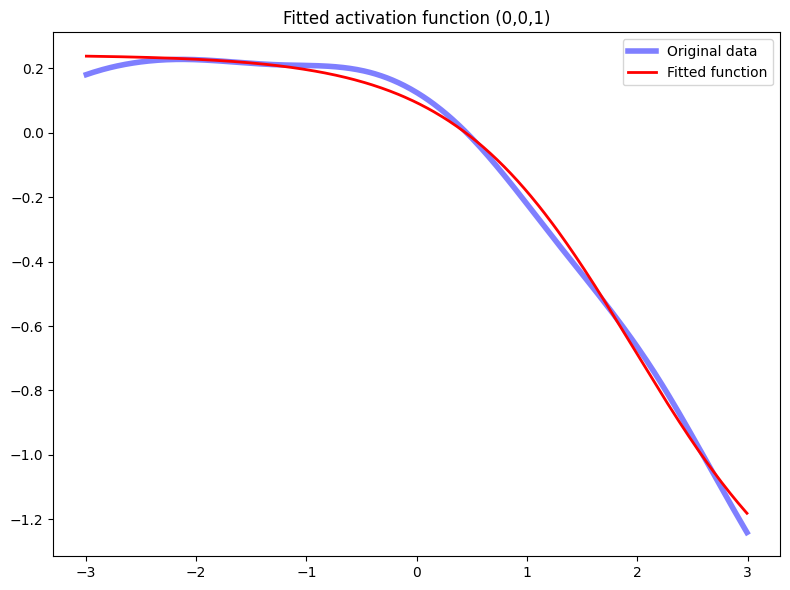

2025-03-11 13:30:06,618 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


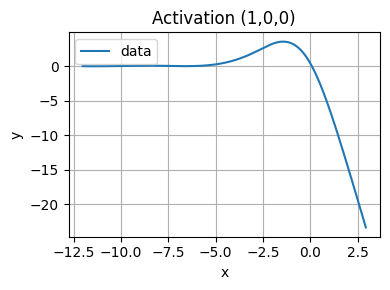

2025-03-11 13:30:06,697 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-11 13:30:06,698 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 21.204708541802027, for constant: [-1.27384383]
2025-03-11 13:30:06,698 - LLMSR.llmSR - INFO - Generating initial population asynchronously
<string>:1: RuntimeWarning: overflow encountered in exp
2025-03-11 13:30:09,857 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 13:30:09,858 - LLMSR.llmSR - INFO - Initial population best: score=-1.8450540604977004, params=[ 3.69199431 -2.00555303  0.46927379 13.62039106], ansatz: params[0] * np.tanh(params[1] * x) + params[2] * np.exp(-params[3] * x**2)...
2025-03-11 13:30:09,859 - LLMSR.llmSR - INFO - Generation 1/9: Generating 10 new individuals. Async? True, elitism? False
<string>:1: RuntimeWarning: overflow encountered in multiply
2025-03-11 13:30:13,596 - LLMSR.llmSR - INFO - Generation 1 best: score=-6.113784625261337, params=[-7.0


API Call Statistics:
  Successful calls (end-to-end): 100
  Failed calls: 10
  Success rate: 90.91%

Breakdown by processing stage:
  Api Call: 110 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 101 succeeded, 9 failed (91.82% success)
  Function Conversion: 100 succeeded, 1 failed (99.01% success)
  Curve Fitting: 100 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 9
  Function Errors:
    - syntax error: 1
Approximation for (1,0,0): params[0] * np.arctan(params[1] * x) + params[2] * x**2 + params[3] * x, with parameters [ 3.462 -2.787 -0.108 -0.334]


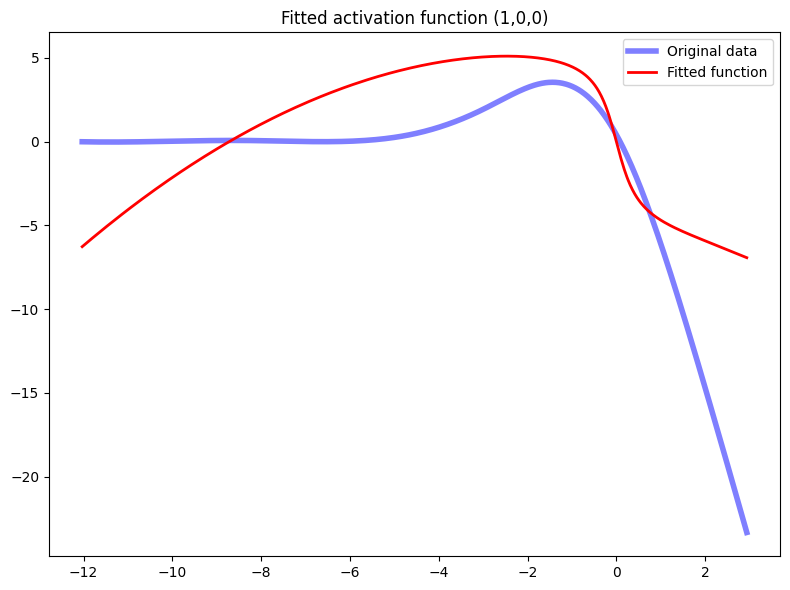

2025-03-11 13:32:18,224 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


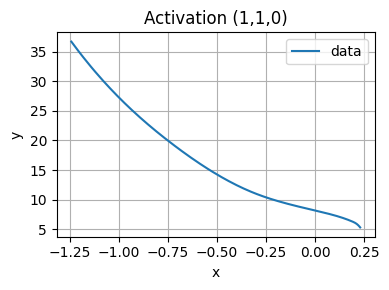

2025-03-11 13:32:18,298 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-11 13:32:18,299 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: 0.48339849959167647, for constant: [10.80681998]
2025-03-11 13:32:18,299 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-11 13:32:20,914 - LLMSR.llmSR - INFO - Generated 10 individuals asynchronously
2025-03-11 13:32:20,914 - LLMSR.llmSR - INFO - Initial population best: score=-0.0014431083956950438, params=[ 7.79193708 -1.25326534 -0.0754455 ], ansatz: params[0] * np.exp(params[1] * x) + params[2]...
2025-03-11 13:32:20,915 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-11 13:32:20,915 - LLMSR.llmSR - INFO - Successfully found expression for connection (1,1,0)


Approximation for (1,1,0): params[0] * np.exp(params[1] * x) + params[2], with parameters [ 7.792 -1.253 -0.075]


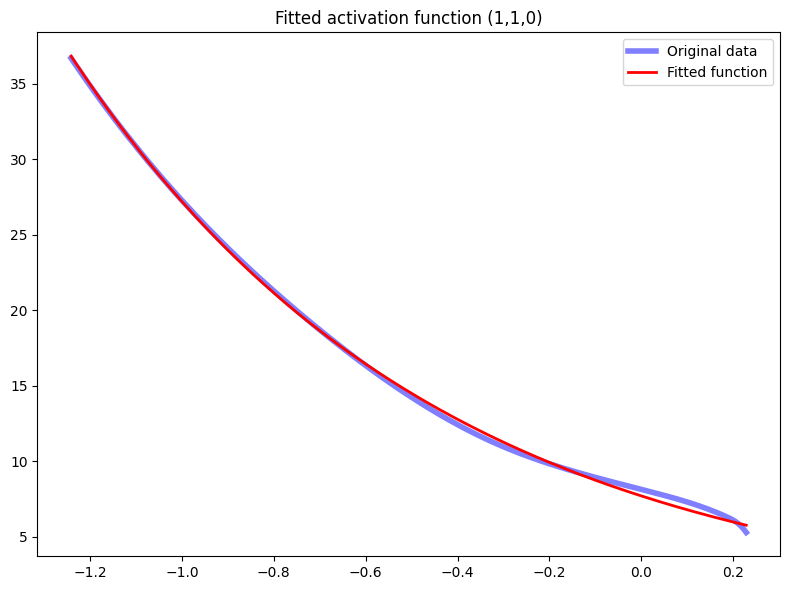

2025-03-11 13:32:21,105 - LLMSR.llmSR - INFO - KAN conversion complete: 4 total connections
2025-03-11 13:32:21,105 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed


Approximation for (0, 0, 0): params[0] * np.power(x, 3) + params[1] * x + params[2]
Parameters are [-0.1 -1.6 -3. ]
Approximation for (0, 0, 1): params[0] * np.tanh(params[1] * x + params[2]) + params[3]
Parameters are [-0.9  0.6 -1.2 -0.7]
Approximation for (1, 0, 0): params[0] * np.arctan(params[1] * x) + params[2] * x**2 + params[3] * x
Parameters are [ 3.5 -2.8 -0.1 -0.3]
Approximation for (1, 1, 0): params[0] * np.exp(params[1] * x) + params[2]
Parameters are [ 7.8 -1.3 -0.1]
Final training loss: 0.0032812487334012985


In [15]:
res = LLMSR.kan_to_symbolic(pruned_model, client, gpt_model="openai/gpt-4o", exit_condition=min(train_loss).item(), generations=10)
symb_expr_sorted = kan_sr.sort_symb_expr(res)


print(f"Final training loss: {train_loss[-1]}")


## Extract symbolic expressions from the trained KAN model

Now that we have a trained model, and have fitted each activation function, we can extract symbolic expressions from it. We then feed it to an LLM to simplify it.

In [225]:
# build expression tree
node_data = LLMSR.kan_sr.build_expression_tree(pruned_model, symb_expr_sorted, top_k=3)
print(node_data['full_expressions'])

KAN Connection: (0, 0, 0), Best Expression: -0.0983 * np.power( x , 3) + -1.5633 * x + -3.0167, Score: -0.23027
KAN Connection: (0, 0, 1), Best Expression: -0.9137 * np.tanh(0.6157 * x + -1.2130) + -0.6713, Score: -0.03424
KAN Connection: (1, 0, 0), Best Expression: 3.4623 * np.arctan(-2.7873 * x) + -0.1080 * x**2 + -0.3341 * x, Score: -1.70127
KAN Connection: (1, 1, 0), Best Expression: 7.7919 * np.exp(-1.2533 * x) + -0.0754, Score: -0.00144
['0.03284203*x0**3 + 0.52229853*x0 - 0.98285172012*(0.0325852753008254*x0**3 + 0.518215268339576*x0 + 1)**2 + 18.0731068249176*exp(1.14514021*tanh(0.6157*x0 - 1.213)) + 3.4623*atan(0.27399159*x0**3 + 4.35738609*x0 + 8.40844791) + 0.93247947']


###################################################
Simplifying output 0
KAN expression (raw):
 0.03284203*x0**3 + 0.52229853*x0 - 0.98285172012*(0.0325852753008254*x0**3 + 0.518215268339576*x0 + 1)**2 + 18.0731068249176*exp(1.14514021*tanh(0.6157*x0 - 1.213)) + 3.4623*atan(0.27399159*x0**3 + 4.35738609*x0 + 8.40844791) + 0.93247947
KAN expression (simplified):
 0.0328*x0**3 + 0.5223*x0 - 0.9829*(0.0326*x0**3 + 0.5182*x0 + 1)**2 + 18.0731*exp(1.1451*tanh(0.6157*x0 - 1.213)) + 3.4623*atan(0.274*x0**3 + 4.3574*x0 + 8.4084) + 0.9325
Converted to numpy, and replaced the new floats with 'params':  params[8]*x0**3 + params[3]*x0 - params[4]*(params[5]*x0**3 + params[10]*x0 + 1)**2 + params[0]*np.exp(params[11]*np.tanh(params[1]*x0 - params[12])) + params[2]*np.arctan(params[13]*x0**3 + params[7]*x0 + params[9]) + params[6]
Refitting: params[8]*x0**3 + params[3]*x0 - params[4]*(params[5]*x0**3 + params[10]*x0 + 1)**2 + params[0]*np.exp(params[11]*np.tanh(params[1]*x0 - params[12])) + params[2

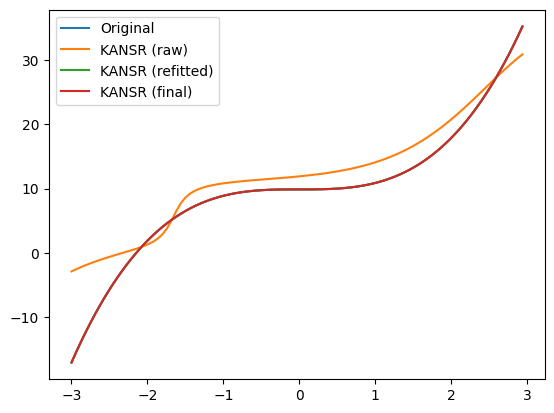

###############################
# Final formula for output 0: #
###############################
 1.0*x0**3 + 0.0001*x0 + 9.8696 with a chi^2 of 7.730e-12
best expression: 1.0*x0**3 + 0.0001*x0 + 9.8696, at index 0, with chi^2 7.730265046775928e-12
initially: 0
refitting all coefficients in KAN: 1.0*x0**3 + 0.0001*x0 + 9.8696, chi^2 7.730265046775928e-12
simplifying by LLM and refitting again: x0**3 + 9.8696, chi^2 7.767227780689994e-12


In [ ]:
# Convert training data to numpy arrays for optimization
x_data = dataset['train_input'].cpu().numpy().flatten()
y_data = dataset['train_label'].cpu().numpy().flatten()

full_expressions = node_data['full_expressions']
# Optimize and simplify the expression
best_expressions, best_chi_squareds, result_dicts = kan_sr.optimize_expression(
    client, full_expressions, 'gpt-4o', x_data, y_data, 
    custom_system_prompt=None, original_f = f, prune_small_terms=True
)
result_dict = result_dicts[0]

# Print the results
best_index = result_dict['best_expression_index']
print(f"best expression: {result_dict['best_expression']}, at index {best_index}, with chi^2 {result_dict['best_chi_squared']}")
print(f"initially: {result_dict['raw_expression'][best_index]}")
print(f"refitting all coefficients in KAN: {result_dict['final_KAN_expression'][best_index]}, chi^2 {result_dict['chi_squared_KAN_final'][best_index]}")
print(f"simplifying by LLM and refitting again: {result_dict['final_LLM_expression'][best_index]}, chi^2 {result_dict['chi_squared_LLM_final'][best_index]}")

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

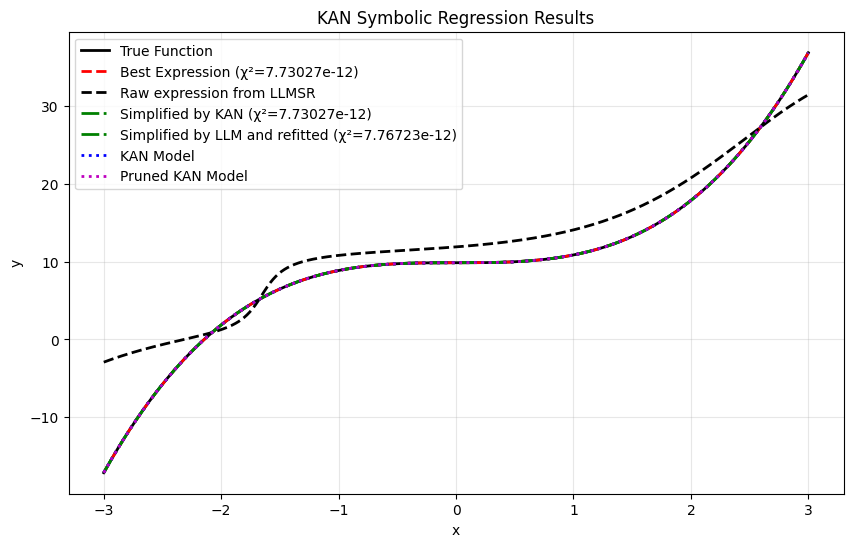

In [227]:
kan_sr.plot_results(f,x_range,result_dict,model=model,pruned_model=pruned_model)

In [5]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f,
    ranges=x_range,
    width=[1, 4, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=500,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=system_prompt_for_second_simplification,
    generations = 3,
    population=10,
    plot_parents=True,
    demonstrate_parent_plotting=True
)


# Print the final expressions
print(f"Raw expression: {results['result_dict']['raw_expression']}")
print(f"best expression: {results['result_dict']['best_expression']}, at index {results['result_dict']['best_expression_index']}, with chi^2 {results['result_dict']['best_chi_squared']}")


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.45e-04 | test_loss: 6.42e-04 | reg: 0.00e+00 | :  59%|▌| 293/500 [02:01<00:36,  5.60

In [ ]:
# dataset = kan_sr.create_dataset(f, n_var=1, ranges=x_range, train_num=10000, test_num=1000, device="cpu")
# x_data = dataset['train_input'].cpu().numpy().flatten()
# y_data = dataset['train_label'].cpu().numpy().flatten()

# out = kan_sr.optimize_expression(
#     client, results['result_dict']['raw_expression'], 'openai/gpt-4o', x_data, y_data, 
#     custom_system_prompt=None, original_f = f, prune_small_terms=True
# )


#out = optimize_expression(client, full_expressions, 'gpt_model', x_data, y_data, custom_system_prompt=None, original_f = None, prune_small_terms =True ):

EXPR STR:  -0.0113*x0**2 + 5.4398*x0 + 9.8578
UNKNOWN FUNCTIONS:  []
EXPR STR:  -0.0113*x0**2 + 5.4398*x0 + 9.8578
EXPR STR:  0.2776*x0**2 + 1.7879*x0 - 0.0685*(0.0644*x0**2 + 0.4148*x0 - numpy.sin(1.4303*x0) + 0.2512)**3 + 0.5194*(0.0644*x0**2 + 0.4148*x0 - numpy.sin(1.4303*x0) + 0.2512)**2 + 1.6829*numpy.exp(0.7036*x0) - 58.3449*numpy.exp((-1.9897*numpy.exp(0.5175*x0) - 6.8402*numpy.exp(1.818*x0) - 0.1122)*numpy.exp(-0.5175*x0)/(60.9882*numpy.exp(1.818*x0) + 1)) - 0.0931*numpy.exp(0.5074*numpy.exp(0.7036*x0) + 0.5405*numpy.sin(1.4633*x0)) - 4.1123*numpy.exp(0.0508*x0**2 + 0.0366*x0 + 0.1612*numpy.sin(3.9956*x0)) - 39.6584*numpy.log((3.09*numpy.exp(0.5175*x0) + 8.5566*numpy.exp(1.818*x0) + 36.6539082*numpy.exp(2.3355*x0) + 0.1403)/(1.0*numpy.exp(0.5175*x0) + 60.9882*numpy.exp(2.3355*x0))) - 4.31*numpy.sin(1.4303*x0) + 1.7926*numpy.sin(1.4633*x0) + 53.1999
UNKNOWN FUNCTIONS:  []
EXPR STR:  0.2776*x0**2 + 1.7879*x0 - 0.0685*(0.0644*x0**2 + 0.4148*x0 - np.sin(1.4303*x0) + 0.2512)**3 + 0.

<string>:1: RuntimeWarning: invalid value encountered in log


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

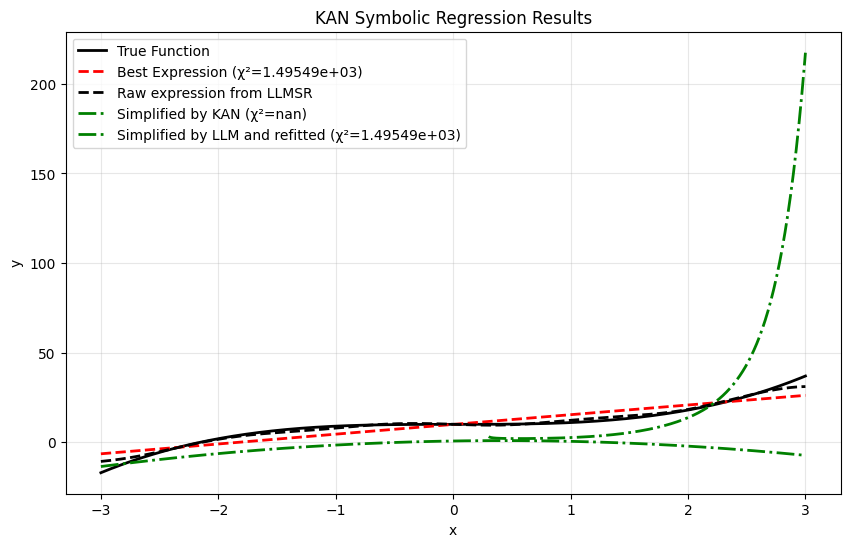

In [6]:
kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results")

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f,
    ranges=x_range,
    width=[1, 4, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=500,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=None,
    generations = 3,
    population=10,
    plot_parents=False,
    demonstrate_parent_plotting=False
)

# Print the final expressions
print(f"Raw expression: {results['result_dict']['raw_expression']}")
print(f"best expression: {results['result_dict']['best_expression']}, at index {results['result_dict']['best_expression_index']}, with chi^2 {results['result_dict']['best_chi_squared']}")

In [ ]:
kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results")

## Optimize and simplify the expression

Now we'll optimize the parameters of the expression and use SymPy and the LLM to simplify it.

## Example 2: More Complex Function

Now let's try a more complex function to showcase the power of KAN symbolic regression.

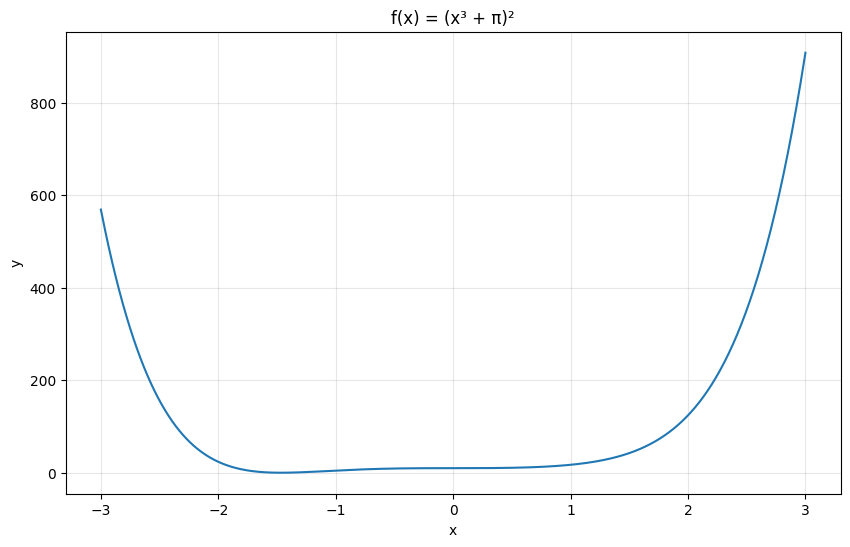

In [229]:
# Define a more complex target function: f(x) = (x³ + π)²
def target_function2(x):
    return (x**3 + np.pi)**2

# Define the function as a PyTorch function
def f2(x):
    return (x**3 + torch.pi)**2

# Plot the function
x_range2 = (-3, 3)
x = np.linspace(x_range2[0], x_range2[1], 1000)
y = target_function2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(f"f(x) = (x³ + π)²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run the complete pipeline with custom parameters
results = kan_sr.run_complete_pipeline(
    client, f,
    ranges=x_range2,
    width=[1, 6, 1],  # Use a wider network for this more complex function
    grid=7,
    k=3,
    train_steps=500,  # More training steps
    gpt_model="openai/gpt-4o",
    node_th=0.1,      # More conservative pruning
    edge_th=0.1,
    custom_system_prompt_for_second_simplification=None,
    generations = 3,
    population=10,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

# Print the final expressions
print(f"Raw expression: {results['result_dict']['raw_expression']}")
print(f"best expression: {results['result_dict']['best_expression']}, at index {results['result_dict']['best_expression_index']}, with chi^2 {results['result_dict']['best_chi_squared']}")
print(f"LLM simplified: {results['result_dict']['final_LLM_expression']}")
print(f"Chi-squared: {results['result_dict']['chi_squared_LLM_final']}")

In [ ]:
kan_sr.plot_results(f, x_range, results['result_dict'], title="KAN Symbolic Regression Results")

## Custom Example

Define a custom function below and run the pipeline.

In [ ]:
# Define your own target function
def custom_target_function(x):
    # Replace this with your own function
    return np.sin(x) * np.exp(-0.1 * x**2)

# Define the function as a PyTorch function
def custom_f(x):
    # Replace this with your own function
    return torch.sin(x) * torch.exp(-0.1 * x**2)

# Choose a suitable x range
custom_x_range = (-5, 5)

# Plot the function
x = np.linspace(custom_x_range[0], custom_x_range[1], 1000)
y = custom_target_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Custom Function: sin(x) * exp(-0.1 * x²)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run the pipeline on your custom function
custom_results = kan_sr.run_complete_pipeline(
    client, custom_f,
    x_range=custom_x_range,
    width=[1, 8, 1],  # Use a wider network for complex functions
    grid=8,
    k=4,
    train_steps=500,  # More training steps for better results
    gpt_model='openai/gpt-4o',
    node_th=0.1,  
    edge_th=0.1,
    custom_system_prompt= None
)

# Print the final expressions
print(f"Raw expression: {custom_results['result_dict']['raw_expression']}")
print(f"SymPy simplified: {custom_results['result_dict']['simplified_expression']}")
print(f"LLM simplified: {custom_results['result_dict']['llm_simplified']}")
print(f"Chi-squared: {custom_results['result_dict']['chi_squared']}")

In [ ]:
# Plot the results for your custom function
fig, ax = kan_sr.plot_results(
    custom_f, custom_x_range, custom_results['result_dict'], 
    title="KAN Symbolic Regression: Custom Function"
)
plt.show()

## Experiment with Different Parameters

You can experiment with different model parameters to see how they affect the results.

In [ ]:
# Define different model configurations
configs = [
    {
        'name': 'Small Network',
        'width': [1, 4, 1],
        'grid': 5,
        'k': 3,
        'train_steps': 50
    },
    {
        'name': 'Medium Network',
        'width': [1, 8, 1],
        'grid': 7,
        'k': 3,
        'train_steps': 100
    },
    {
        'name': 'Deep Network',
        'width': [1, 4, 4, 1],
        'grid': 6,
        'k': 3,
        'train_steps': 150
    }
]

# Choose one config to run (change the index to try different configs)
config_idx = 0
config = configs[config_idx]

print(f"Running with configuration: {config['name']}")
print(f"Network width: {config['width']}")
print(f"Grid size: {config['grid']}")
print(f"Basis functions: {config['k']}")
print(f"Training steps: {config['train_steps']}")

In [ ]:
# Run the pipeline with the selected configuration
# You can use one of the previous functions or define a new one
experiment_results = kan_sr.run_complete_pipeline(
    client, f,  # Using the first example function
    x_range=x_range,
    width=config['width'],
    grid=config['grid'],
    k=config['k'],
    train_steps=config['train_steps'],
    gpt_model='openai/gpt-4o',
    node_th=0.1,
    edge_th=0.1,
    custom_system_prompt=None
)

# Print the final expressions
print(f"Raw expression: {experiment_results['result_dict']['raw_expression']}")
print(f"SymPy simplified: {experiment_results['result_dict']['simplified_expression']}")
print(f"LLM simplified: {experiment_results['result_dict']['llm_simplified']}")
print(f"Chi-squared: {experiment_results['result_dict']['chi_squared']}")

In [ ]:
# Plot the results
fig, ax = kan_sr.plot_results(
    f, x_range, experiment_results['result_dict'], 
    title=f"KAN Symbolic Regression with {config['name']}"
)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# # initialize KAN with G=3
# model = KAN(width=[1,1,1,1], grid=7, k=3, seed=0, device=device, symbolic_enabled=False)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x))
out_test = LLMSR.kan_sr.run_complete_pipeline(client, f, ranges=[-1,1], width=[1,2,1], grid=7, k=3, train_steps=100, gpt_model="openai/gpt-4o", node_th=0.1, edge_th=0.1, plot_parents=True, generations=3, population=3)